<a href="https://colab.research.google.com/github/aeyeniay/AdvancedProject2/blob/main/AP_Tirta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [394]:
%matplotlib inline
from warnings import simplefilter
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import shap
shap.initjs()

In [395]:
simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False, 
)
%config InlineBackend.figure_format = 'retina'

In [396]:
df = pd.read_csv(
    "Rice-Data-2018-2021.csv",
    index_col='Date',
    parse_dates=['Date'],
)

df.head()

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   

            Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
Date                                                                    
2018-01-01                            9792.59                    0.54   
2018-02-01                            9987.10                    1.07   
2018-03-01                            9554.06                    1.77   
2018-04-01                            8991.36                    1.41   
2018-05-01                            9001.50                    1.00   

            Produksi Padi Nasional (10^6 Ton)  \
Date                                            
2018-01-01                               2.78   
2018-02-01                               5.74   
2018-03-01                               9.68   
2018-04-01                               7.60   
2018-05-01                               4.90   

            Produksi Beras Nasional (10^6 Ton)  Productivity (ku/ha)  
Date                                                                  
2018-01-01                                1.59                 51.48  
2018-02-01                                3.29                 53.64  
2018-03-01                                5.55                 54.69  
2018-04-01                                4.36                 53.90  
2018-05-01                                2.81                 49.00

In [397]:
df['Time'] = np.arange(len(df.index))
df

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   
2018-06-01                                9478.05   
2018-07-01                                9519.93   
2018-08-01                                9458.07   
2018-09-01                                9572.03   
2018-10-01                                9645.30   
2018-11-01                                9770.97   
2018-12-01                                9818.07   
2019-01-01                               10111.08   
2019-02-01                               10007.91   
2019-03-01                                9814.53   
2019-04-01                                9464.68   
2019-05-01                                9462.05   
2019-06-01                                9515.51   
2019-07-01                                9519.35   
2019-08-01                                9530.00   
2019-09-01                                9594.39   
2019-10-01                                9659.17   
2019-11-01                                9742.16   
2019-12-01                                9838.26   
2020-01-01                               10032.66   
2020-02-01                               10080.80   
2020-03-01                               10082.43   
2020-04-01                               10018.19   
2020-05-01                                9826.63   
2020-06-01                                9918.95   
2020-07-01                                9931.71   
2020-08-01                                9962.65   
2020-09-01                                9871.12   
2020-10-01                                9812.90   
2020-11-01                                9714.50   
2020-12-01                                9787.86   
2021-01-01                                9780.19   
2021-02-01                                9772.10   
2021-03-01                                9606.97   
2021-04-01                                9549.76   
2021-05-01                                9627.08   
2021-06-01                                9537.16   
2021-07-01                                9401.61   
2021-08-01                                9499.36   
2021-09-01                                9455.56   
2021-10-01                                9449.47   
2021-11-01                                9539.29   
2021-12-01                                9672.54   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   
2018-06-01                               9135.41   
2018-07-01                               9197.78   
2018-08-01                               9172.27   
2018-09-01                               9309.98   
2018-10-01                               9395.39   
2018-11-01                               9603.63   
2018-12-01                               9798.38   
2019-01-01                               9902.68   
2019-02-01                               9799.57   
2019-03-01                               9555.35   
2019-04-01                               9144.20   
2019-05-01                               9142.52   
2019-06-01                               9166.40   
2019-07-01                               9211.03   
2019-08-01                               9224.00   
2019-09-01                               9301.08   
2019-10-01                               9433.88   
2019-11-01                               9522.01   
2019-12-01                               9565.59   
2020-01-0

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-01-01 to 2021-12-01
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Average Price of Premium Quality Rice  48 non-null     float64
 1   Average Price of Medium Quality Rice   48 non-null     float64
 2   Average Price of Bad Quality Rice      48 non-null     float64
 3   Harvest Area (10^6 ha)                 48 non-null     float64
 4   Produksi Padi Nasional (10^6 Ton)      48 non-null     float64
 5   Produksi Beras Nasional (10^6 Ton)     48 non-null     float64
 6   Productivity (ku/ha)                   48 non-null     float64
 7   Time                                   48 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 3.4 KB


In [399]:
# Training data
Waktu = df.loc[:, ['Time']]  # features
x = df[['Harvest Area (10^6 ha)','Produksi Padi Nasional (10^6 Ton)','Produksi Beras Nasional (10^6 Ton)','Productivity (ku/ha)','Time']] # features
HargaBerasPremium = df.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium = df.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas = df.loc[:, 'Average Price of Bad Quality Rice'] # target

### SIMPLE LINEAR REGRESSION
### Average Price of Premium Quality Rice

Coefficients:  [-3.93001465]
Intercept:  9824.14805272109


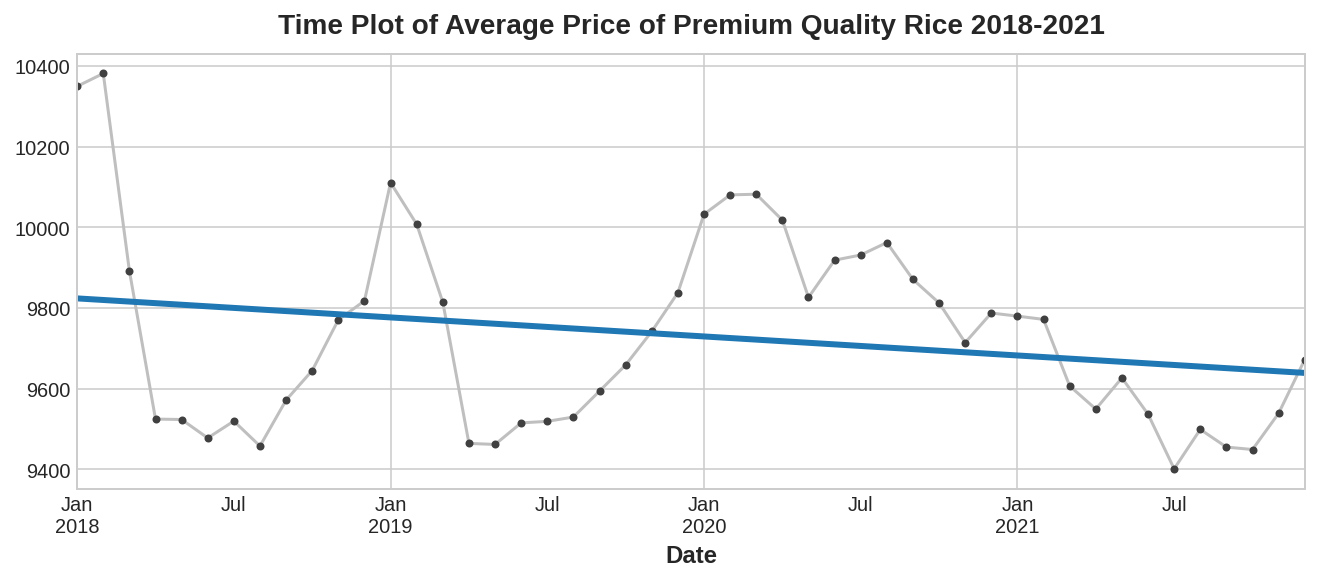

In [400]:
# Train the model
model = LinearRegression()
model.fit(Waktu, HargaBerasPremium)

# Koefisien model
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPricePremium_pred = pd.Series(model.predict(Waktu), index=Waktu.index)

ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2018-2021');

In [401]:
mae = np.mean(np.absolute(AvgPricePremium_pred - HargaBerasPremium))
mse = mean_squared_error(HargaBerasPremium,AvgPricePremium_pred)
r2 =  r2_score(HargaBerasPremium , AvgPricePremium_pred)
rmse = np.sqrt(mean_squared_error(HargaBerasPremium, AvgPricePremium_pred))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasPremium,AvgPricePremium_pred)))
mape = np.mean(np.absolute((AvgPricePremium_pred - HargaBerasPremium) / HargaBerasPremium)) * 100
accuracy = 100 - mape
evaluation = {'SLR Premium': {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}}

### Multiple Linear Regression
### Average Price of Premium Quality Rice

Coefficients:  [-707.42879843   20.04517689  161.82211959   -1.22414373   -4.68243492]
Intercept:  10022.664116733133


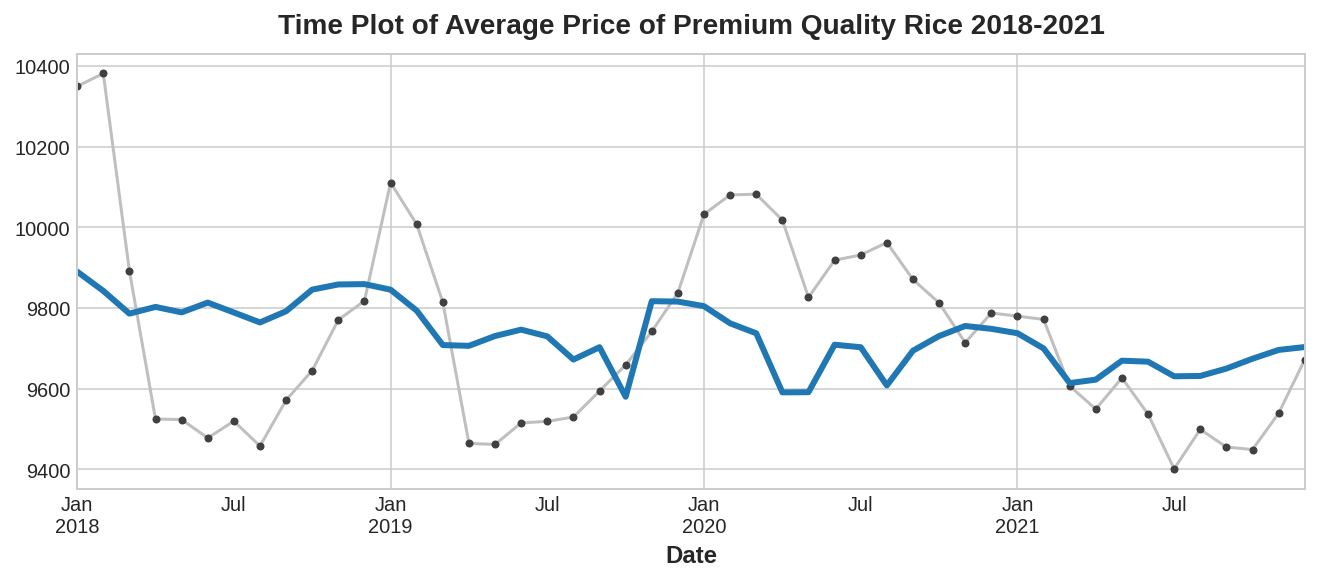

In [402]:
regr = LinearRegression()
regr.fit(x,HargaBerasPremium)

print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

AvgPricePremium_pred_v2 = pd.Series(regr.predict(x), index=Waktu.index)

ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred_v2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2018-2021');

In [403]:
mae = np.mean(np.absolute(AvgPricePremium_pred_v2 - HargaBerasPremium))
mse = mean_squared_error(HargaBerasPremium,AvgPricePremium_pred_v2)
r2 =  r2_score(HargaBerasPremium , AvgPricePremium_pred_v2)
rmse = np.sqrt(mean_squared_error(HargaBerasPremium, AvgPricePremium_pred_v2))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasPremium,AvgPricePremium_pred_v2)))
mape = np.mean(100 * (abs(AvgPricePremium_pred_v2 - HargaBerasPremium) / HargaBerasPremium))
accuracy = 100 - mape
evaluation['MLR Premium'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

In [404]:
explainer = shap.Explainer(regr, x)
shap_values = explainer(x)

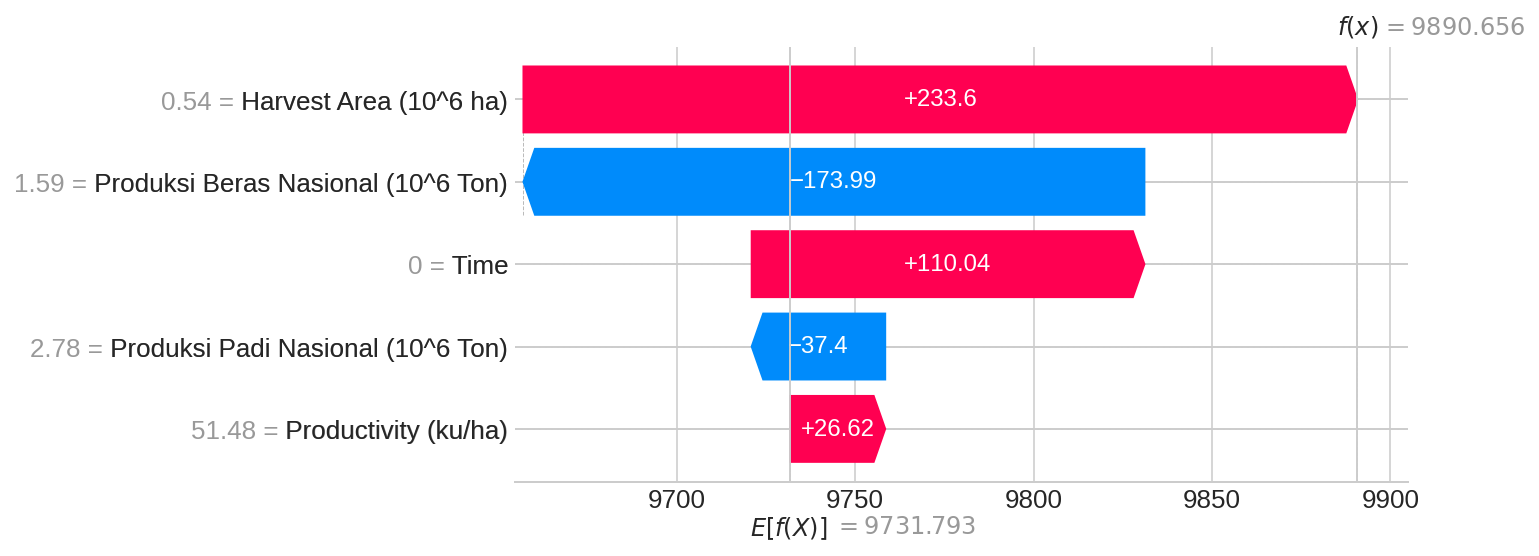

In [405]:
shap.plots.waterfall(shap_values[0])

In [406]:
shap_values = explainer.shap_values(x)

In [407]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x,link="logit")

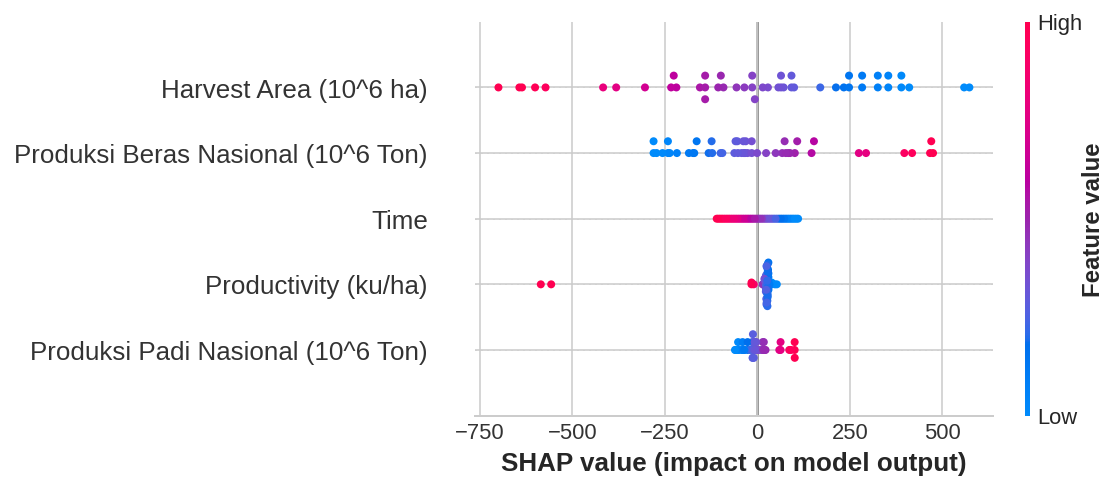

In [408]:
shap.summary_plot(shap_values, x)

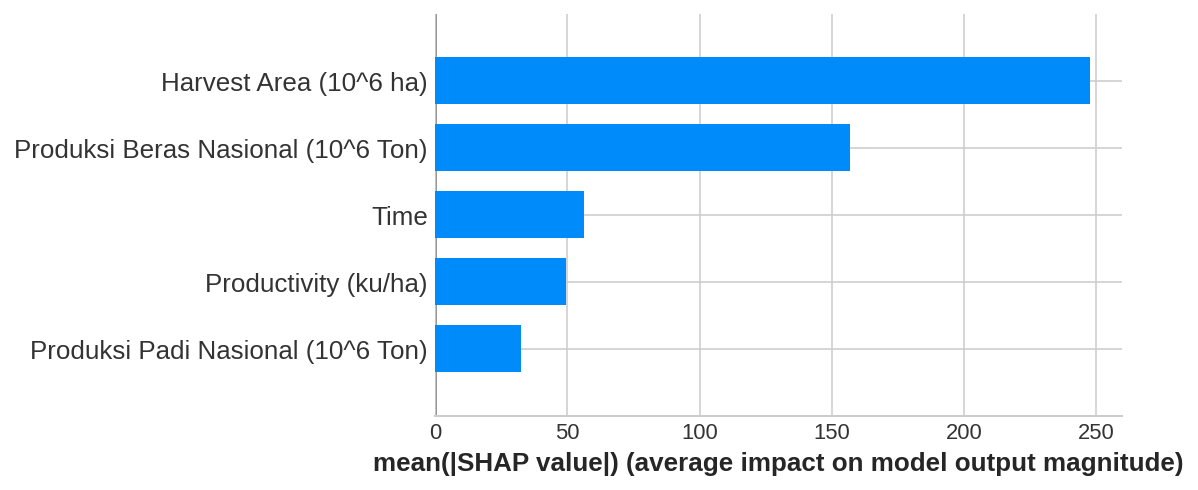

In [409]:
shap.summary_plot(shap_values, x, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Premium Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

## Random Forest
### Average Price of Premium Quality Rice

In [410]:
# Train the model
regressor = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor.fit(x, HargaBerasPremium)
AvgPricePremium_pred_v3 = regressor.predict(x)
print(AvgPricePremium_pred_v3)
print(AvgPricePremium_pred_v3.shape)

[10269.07755 10176.6235   9998.00182  9616.79824  9522.36328  9504.95203
  9514.8603   9482.26896  9547.23476  9694.47729  9770.48827  9870.41695
 10009.00813  9887.40787  9724.39121  9578.04881  9492.55128  9519.27135
  9520.29828  9529.89872  9663.63599  9696.39457  9774.82399  9858.31253
  9966.75713  9989.27339  9999.62224  9945.87558  9862.10304  9872.05899
  9848.20177  9909.58856  9825.93124  9788.35915  9763.00196  9804.08353
  9818.5834   9727.84793  9677.42597  9555.14731  9622.82413  9550.48182
  9448.39216  9499.81238  9465.8354   9513.02068  9591.86472  9681.32745]
(48,)


In [411]:
mae = np.mean(np.absolute(AvgPricePremium_pred_v3 - HargaBerasPremium))
mse = mean_squared_error(HargaBerasPremium,AvgPricePremium_pred_v3)
r2 =  r2_score(HargaBerasPremium , AvgPricePremium_pred_v3)
rmse = np.sqrt(mean_squared_error(HargaBerasPremium, AvgPricePremium_pred_v3))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasPremium,AvgPricePremium_pred_v3)))
mape = np.mean(100 * (abs(AvgPricePremium_pred_v3 - HargaBerasPremium) / HargaBerasPremium))
accuracy = 100 - mape
evaluation['RF Premium'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

In [412]:
AvgPricePremium_pred_with_randomforest = pd.Series(AvgPricePremium_pred_v3, index=x.index)

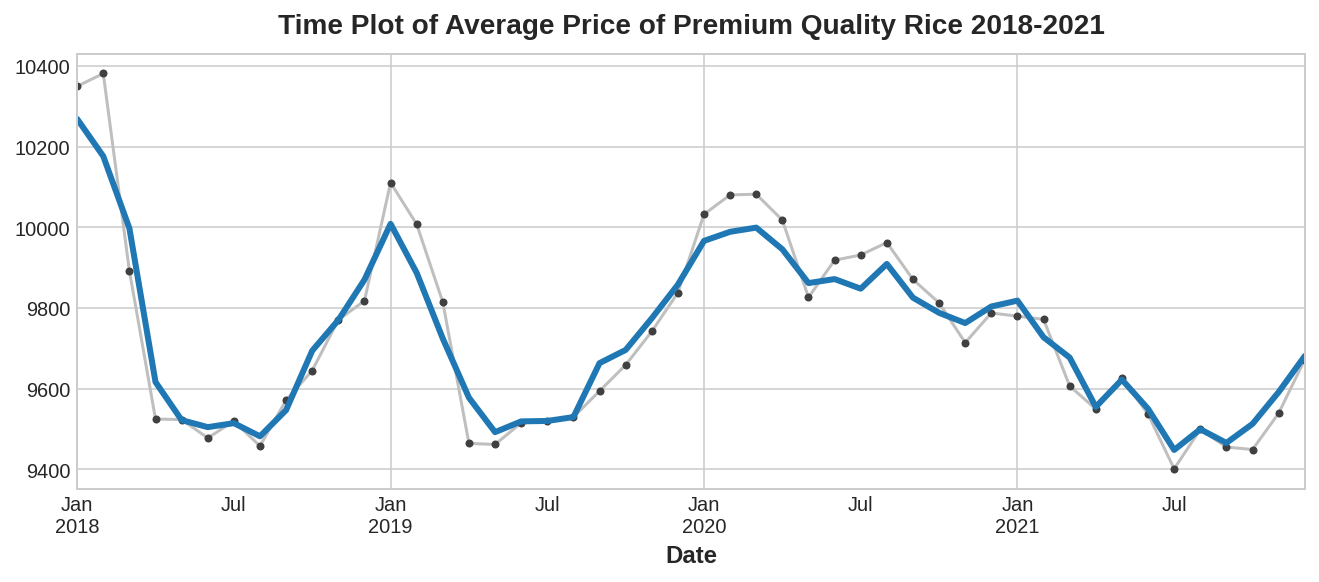

In [413]:
ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2018-2021');

In [414]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x)

In [415]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x,link="logit")

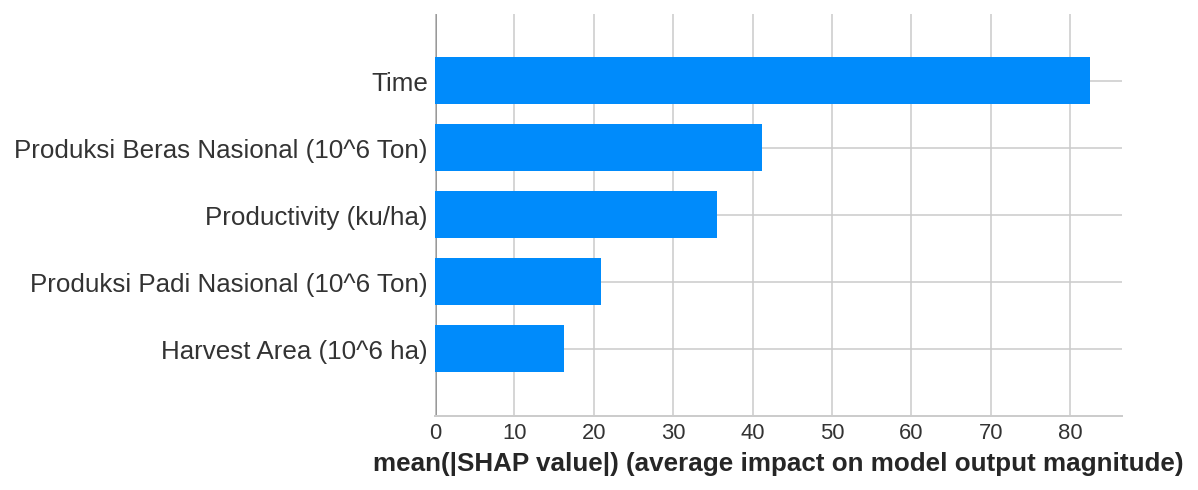

In [416]:
shap.summary_plot(shap_values, x, plot_type="bar")

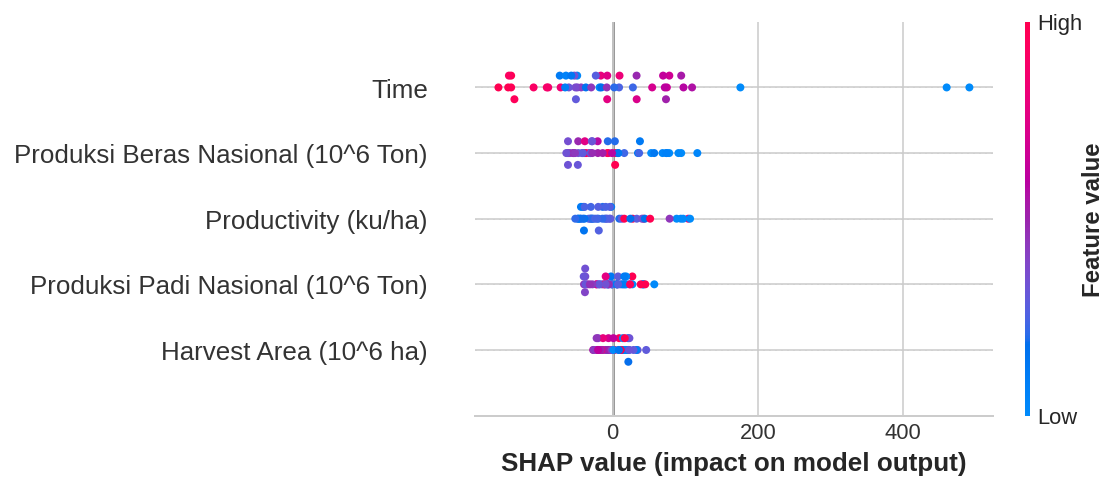

In [417]:
shap.summary_plot(shap_values, x)

    The feature important that has the largest average SHAP value in the Random Forest method on Premium Quality Rice is Time. High values of the Time variable have a high negative contribution on the prediction, while low values have a high positive contribution.

### SIMPLE LINEAR REGRESSION
### Average Price of Medium Quality Rice

Coefficients:  [-11.65526596]
Intercept:  9653.152083333334


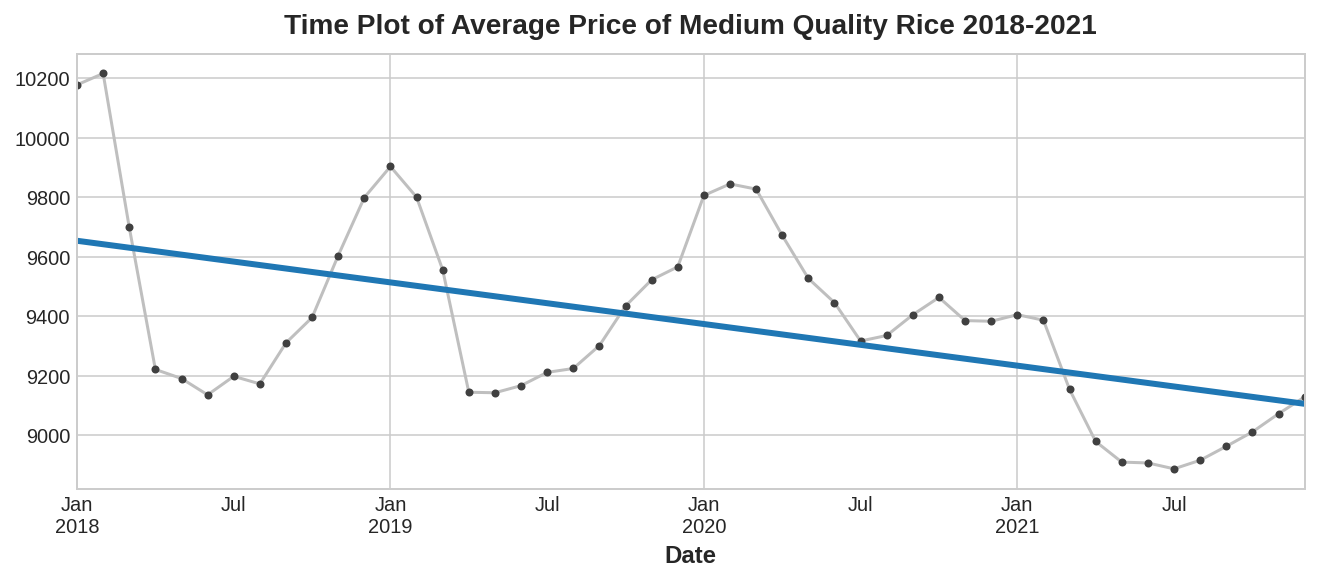

In [418]:
# Train the model
model2 = LinearRegression()
model2.fit(Waktu, HargaBerasMedium)

# Koefisien model
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPriceMedium_pred = pd.Series(model2.predict(Waktu), index=Waktu.index)

ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2018-2021');

In [419]:
mae = np.mean(np.absolute(AvgPriceMedium_pred - HargaBerasMedium))
mse = mean_squared_error(HargaBerasMedium,AvgPriceMedium_pred)
r2 =  r2_score(HargaBerasMedium , AvgPriceMedium_pred)
rmse = np.sqrt(mean_squared_error(HargaBerasMedium, AvgPriceMedium_pred))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasMedium,AvgPriceMedium_pred)))
mape = np.mean(100 * (abs(AvgPriceMedium_pred - HargaBerasMedium) / HargaBerasMedium))
accuracy = 100 - mape
evaluation['SLR Medium'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

### Multiple Linear Regression
### Average Price of Medium Quality Rice

Coefficients:  [-1291.71921865    28.58513239   313.45167229    -1.88781984
   -12.90085416]
Intercept:  9976.51121896735


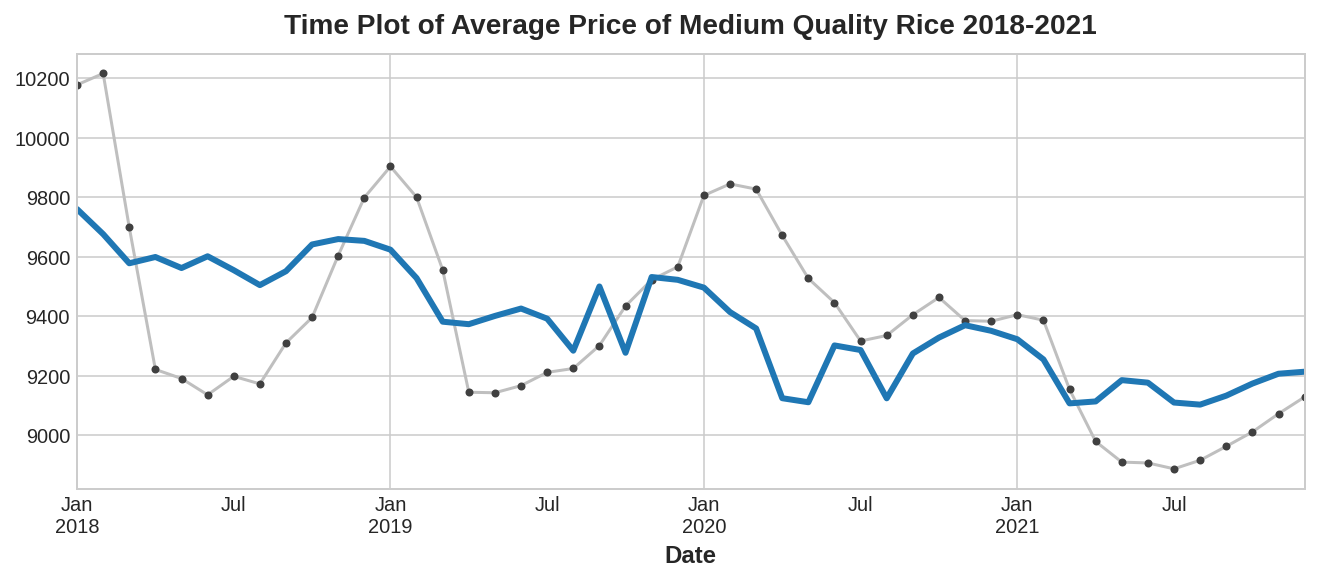

In [420]:
regr_v2 = LinearRegression()
regr_v2.fit(x,HargaBerasMedium)

print('Coefficients: ', regr_v2.coef_)
print ('Intercept: ',regr_v2.intercept_)

AvgPriceMedium_pred_v2 = pd.Series(regr_v2.predict(x), index=Waktu.index)

ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred_v2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2018-2021');

In [421]:
mae = np.mean(np.absolute(AvgPriceMedium_pred_v2 - HargaBerasMedium))
mse = mean_squared_error(HargaBerasMedium,AvgPriceMedium_pred_v2)
r2 =  r2_score(HargaBerasMedium , AvgPriceMedium_pred_v2)
rmse = np.sqrt(mean_squared_error(HargaBerasMedium, AvgPriceMedium_pred_v2))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasMedium,AvgPriceMedium_pred_v2)))
mape = np.mean(100 * (abs(AvgPriceMedium_pred_v2 - HargaBerasMedium) / HargaBerasMedium))
accuracy = 100 - mape
evaluation['MLR Medium'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

In [422]:
explainer_v2 = shap.LinearExplainer(regr_v2, x)
shap_values_v2 = explainer_v2(x)

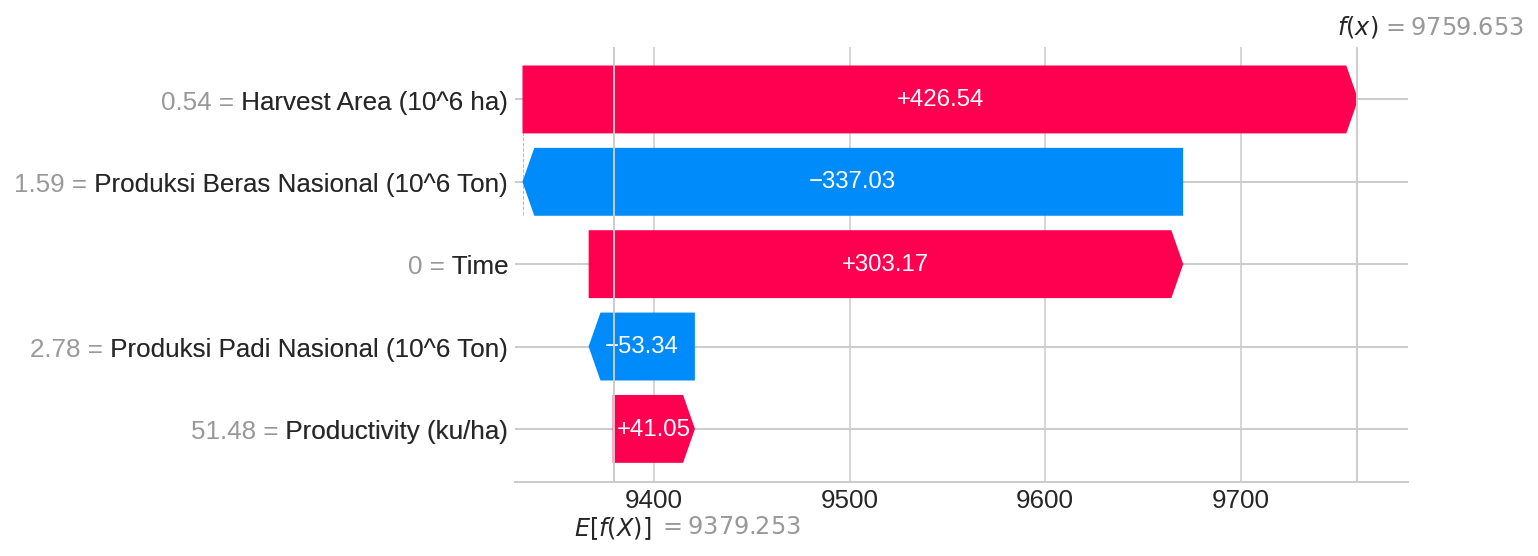

In [423]:
shap.plots.waterfall(shap_values_v2[0])

In [424]:
shap_values_v2 = explainer_v2.shap_values(x)

In [425]:
shap.initjs()
shap.force_plot(explainer_v2.expected_value, shap_values_v2, x,link="logit")

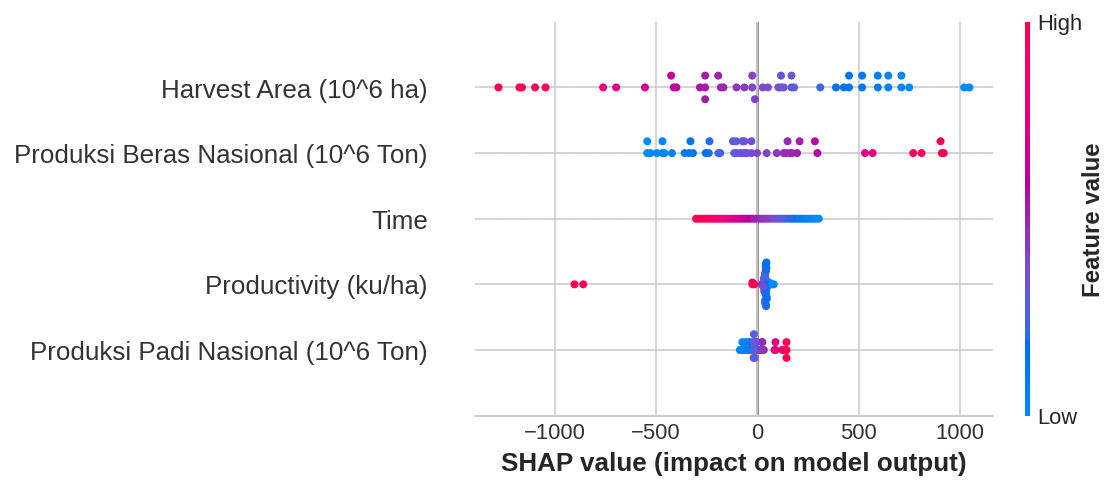

In [426]:
shap.summary_plot(shap_values_v2, x)

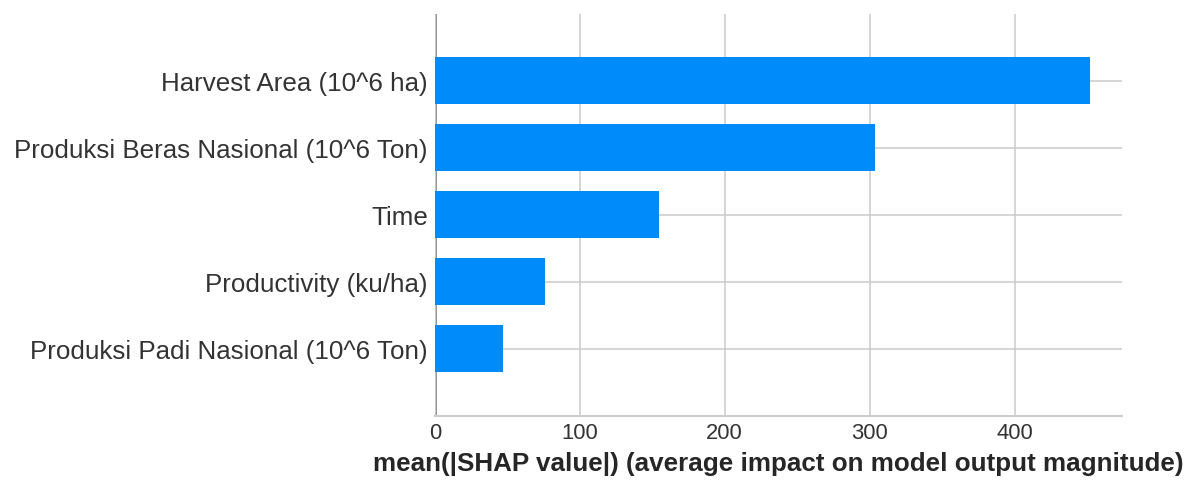

In [427]:
shap.summary_plot(shap_values_v2, x, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Medium Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

## Random Forest
### Average Price of Medium Quality Rice

In [428]:
# Train the model
regressor2 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor2.fit(x, HargaBerasMedium)
AvgPriceMedium_pred_v3 = regressor2.predict(x)
print(AvgPriceMedium_pred_v3)
print(AvgPriceMedium_pred_v3.shape)

[10094.57001  9933.03212  9802.52667  9323.11211  9201.61594  9181.36164
  9210.53057  9186.44303  9271.54156  9456.88568  9597.64824  9782.94176
  9819.95891  9630.54967  9468.87189  9300.54079  9171.98809  9184.45317
  9199.34041  9228.49056  9350.74948  9461.57853  9556.82225  9626.42622
  9748.95699  9702.97504  9680.3128   9577.58493  9485.7292   9471.65554
  9344.3851   9362.34597  9372.21399  9422.89252  9431.45778  9449.1015
  9500.09508  9357.27932  9256.21971  9007.33659  8924.27591  8913.40696
  8909.369    8916.665    8946.3854   9027.4578   9096.33174  9138.62367]
(48,)


In [429]:
mae = np.mean(np.absolute(AvgPriceMedium_pred_v3 - HargaBerasMedium))
mse = mean_squared_error(HargaBerasMedium,AvgPriceMedium_pred_v3)
r2 =  r2_score(HargaBerasMedium , AvgPriceMedium_pred_v3)
rmse = np.sqrt(mean_squared_error(HargaBerasMedium, AvgPriceMedium_pred_v3))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasMedium,AvgPriceMedium_pred_v3)))
mape = np.mean(np.absolute((AvgPriceMedium_pred_v3 - HargaBerasMedium) / HargaBerasMedium)) * 100
accuracy = 100 - mape
evaluation['RF Medium'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

In [430]:
AvgPriceMedium_pred_with_randomforest = pd.Series(AvgPriceMedium_pred_v3, index=x.index)

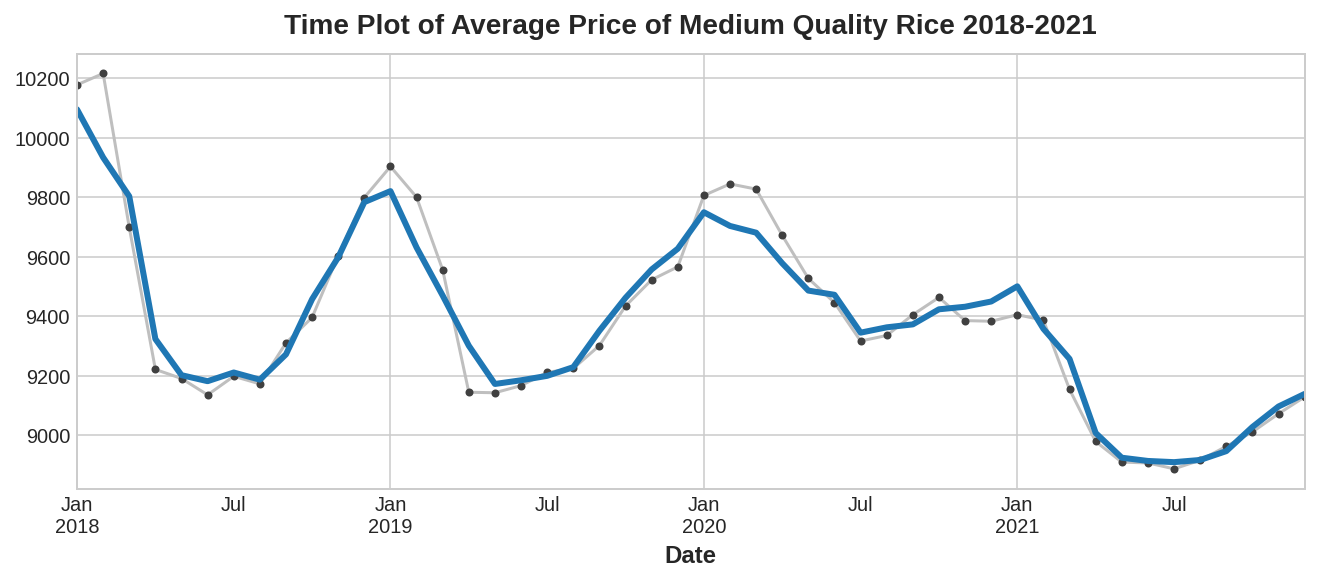

In [431]:
ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2018-2021');

In [432]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(regressor2)
shap_values = explainer.shap_values(x)

In [433]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x,link="logit")

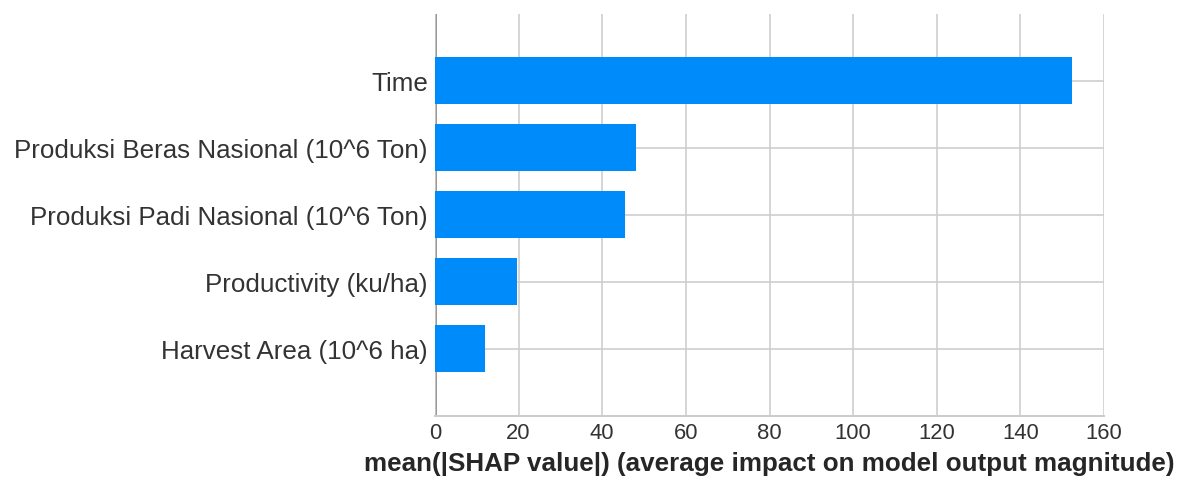

In [434]:
shap.summary_plot(shap_values, x, plot_type="bar")

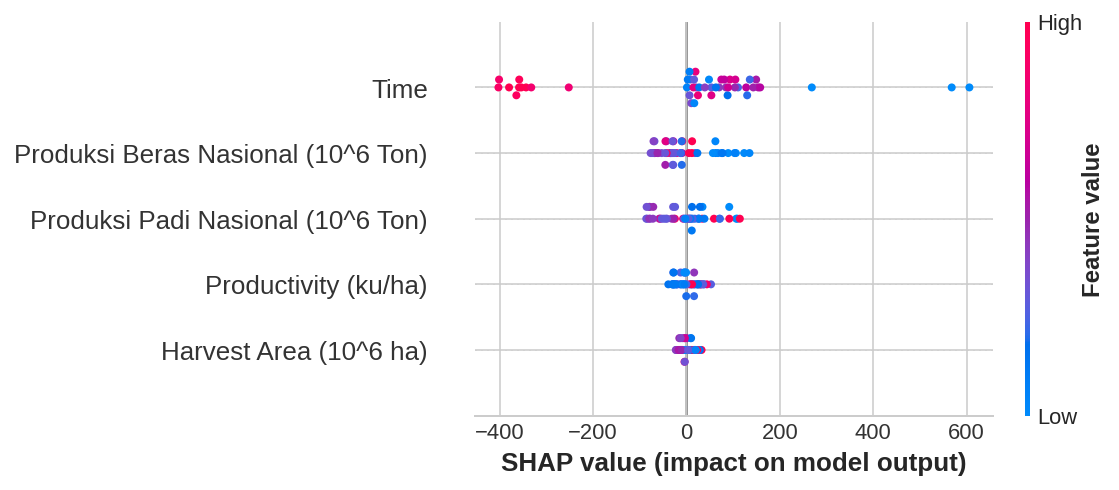

In [435]:
shap.summary_plot(shap_values, x)

    The feature important that has the largest average SHAP value in the Random Forest method on Medium Quality Rice is Time. High values of the Time variable have a high negative contribution on the prediction, while low values have a high positive contribution. The feature Productivity and Harvest Area have almost no contribution to the prediction, whether its values are high or low.

### SIMPLE LINEAR REGRESSION
### Average Price of Bad Quality Rice

Coefficients:  [-14.65497395]
Intercept:  9429.6068877551


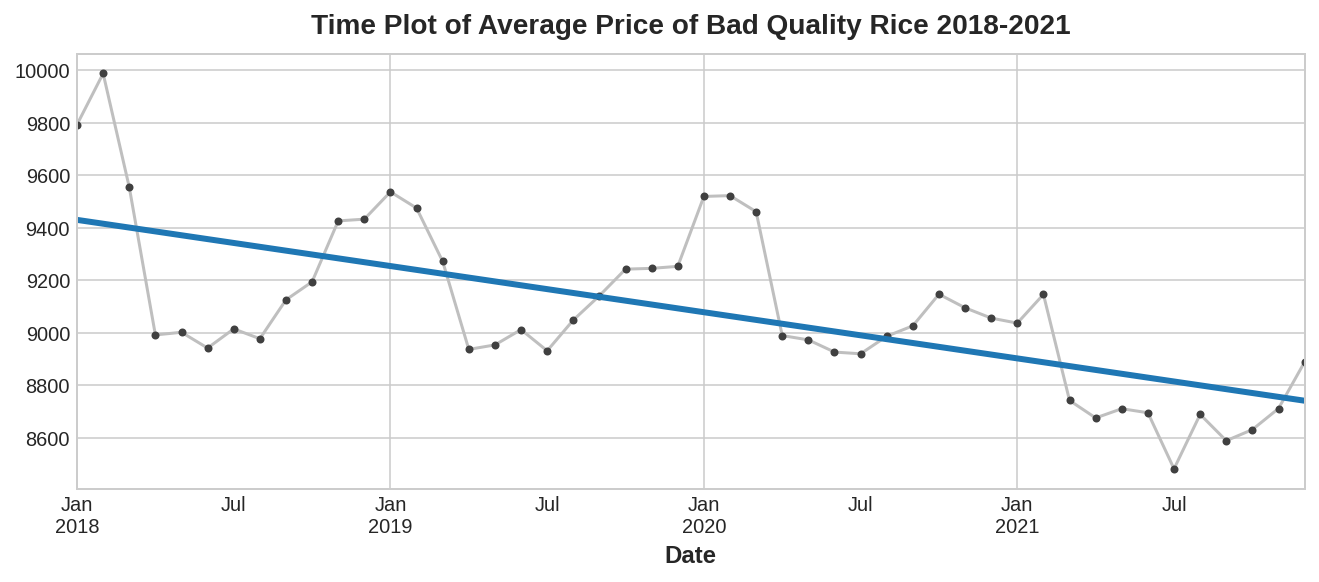

In [436]:
# Train the model
model3 = LinearRegression()
model3.fit(Waktu, HargaBerasLuarkualitas)

# Koefisien model
print ('Coefficients: ', model3.coef_)
print ('Intercept: ',model3.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPriceBad_pred = pd.Series(model3.predict(Waktu), index=Waktu.index)

ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceBad_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Bad Quality Rice 2018-2021');

In [437]:
mae = np.mean(np.absolute(AvgPriceBad_pred - HargaBerasLuarkualitas))
mse = mean_squared_error(HargaBerasLuarkualitas,AvgPriceBad_pred)
r2 =  r2_score(HargaBerasLuarkualitas , AvgPriceBad_pred)
rmse = np.sqrt(mean_squared_error(HargaBerasLuarkualitas, AvgPriceBad_pred))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasLuarkualitas,AvgPriceBad_pred)))
mape = np.mean(100 * (abs(AvgPriceBad_pred - HargaBerasLuarkualitas) / HargaBerasLuarkualitas))
accuracy = 100 - mape
evaluation['SLR Bad'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

### Multiple Linear Regression
### Average Price of Bad Quality Rice

Coefficients:  [-1464.84392496    56.02771781   313.71592869    -1.9122463
   -15.97107793]
Intercept:  9778.868397528951


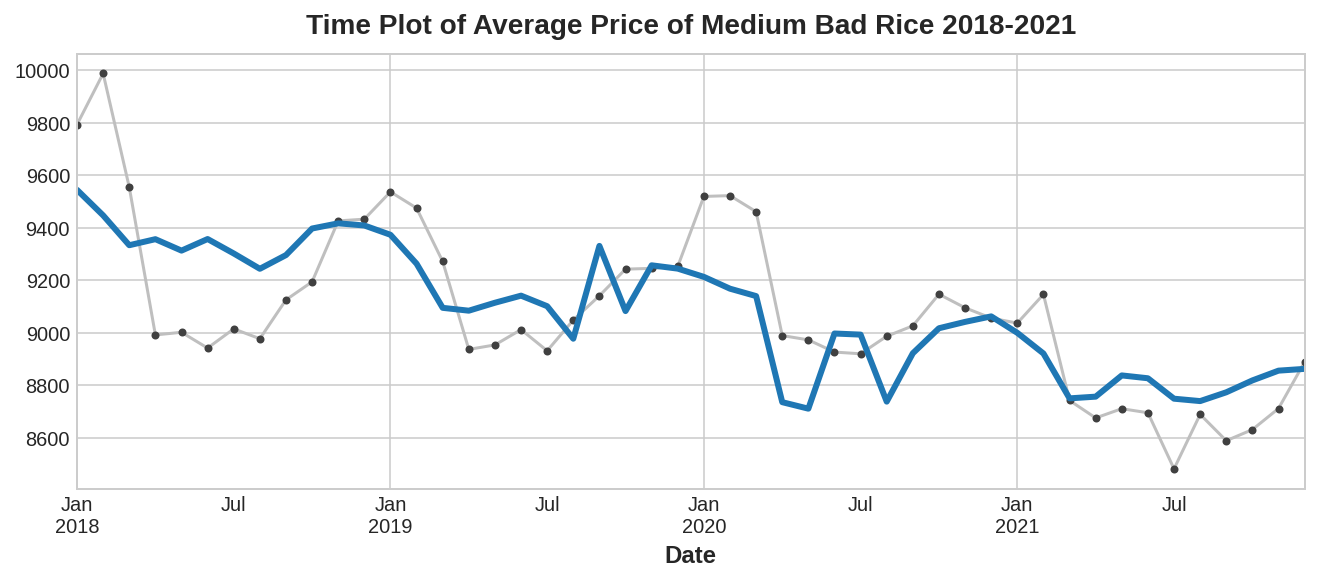

In [438]:
regr_v3 = LinearRegression()
regr_v3.fit(x,HargaBerasLuarkualitas)

print('Coefficients: ', regr_v3.coef_)
print ('Intercept: ',regr_v3.intercept_)

AvgPriceBad_pred_v2 = pd.Series(regr_v3.predict(x), index=Waktu.index)

ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceBad_pred_v2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Bad Rice 2018-2021');

In [439]:
mae = np.mean(np.absolute(AvgPriceBad_pred_v2 - HargaBerasLuarkualitas))
mse = mean_squared_error(HargaBerasLuarkualitas,AvgPriceBad_pred_v2)
rss = np.mean((AvgPriceBad_pred_v2 - HargaBerasLuarkualitas) ** 2)
r2 =  r2_score(HargaBerasLuarkualitas , AvgPriceBad_pred_v2)
rmse = np.sqrt(mean_squared_error(HargaBerasLuarkualitas, AvgPriceBad_pred_v2))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasLuarkualitas,AvgPriceBad_pred_v2)))
mape = np.mean(100 * (abs(AvgPriceBad_pred_v2 - HargaBerasLuarkualitas) / HargaBerasLuarkualitas))
accuracy = 100 - mape
evaluation['MLR Bad'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

In [440]:
explainer_v3 = shap.LinearExplainer(regr_v3, x)
shap_values_v3 = explainer_v3(x)

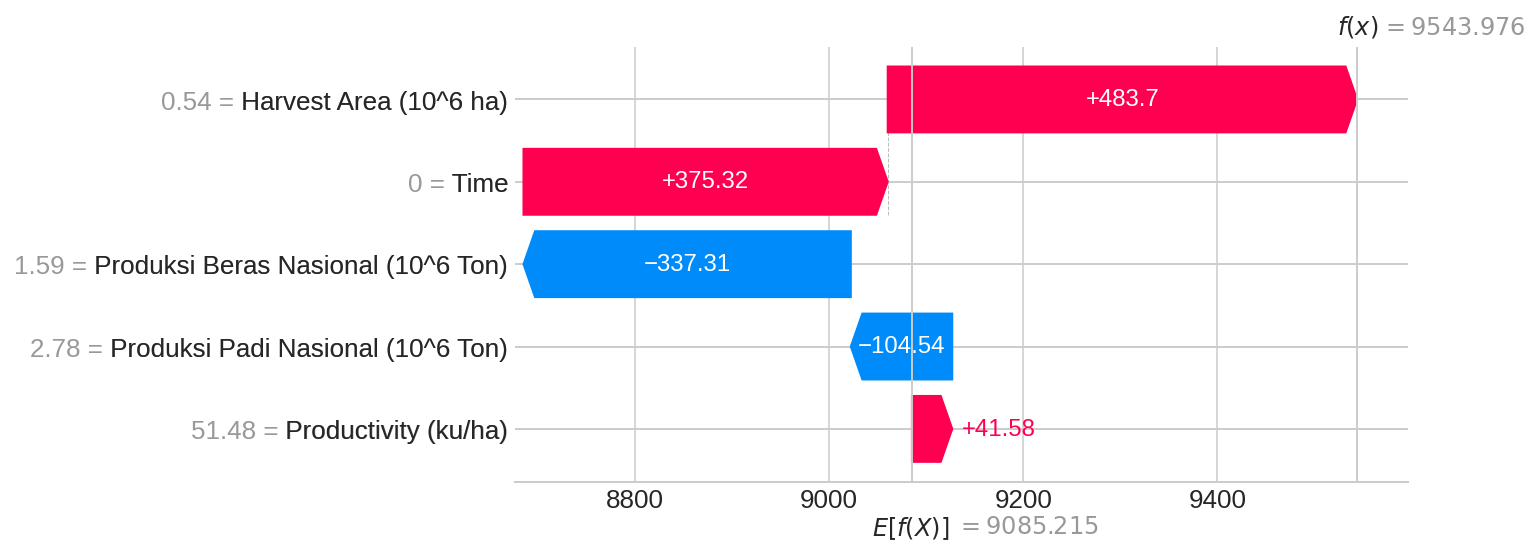

In [441]:
shap.plots.waterfall(shap_values_v3[0])

In [442]:
shap_values_v3 = explainer_v3.shap_values(x)

In [443]:
shap.initjs()
shap.force_plot(explainer_v3.expected_value, shap_values_v3, x,link="logit")

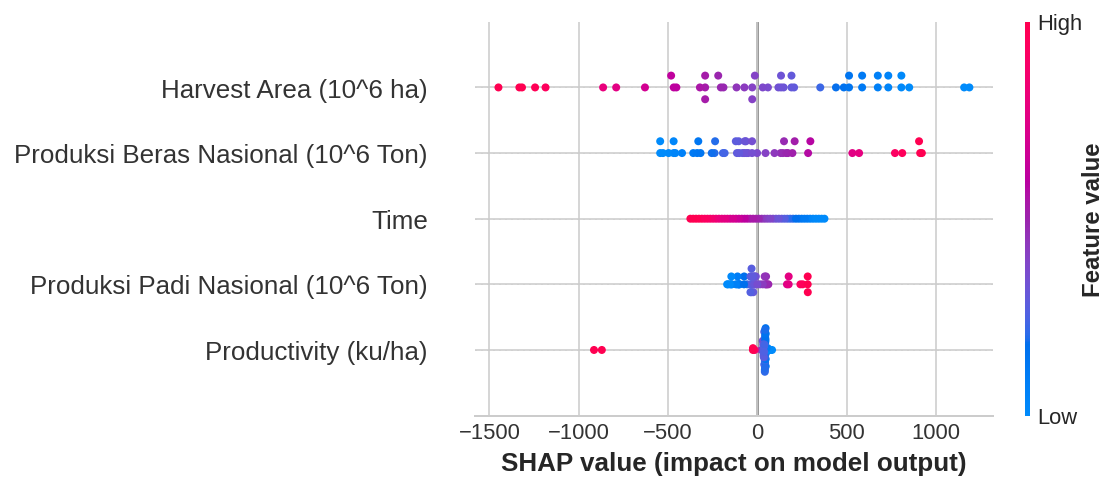

In [444]:
shap.summary_plot(shap_values_v3, x)

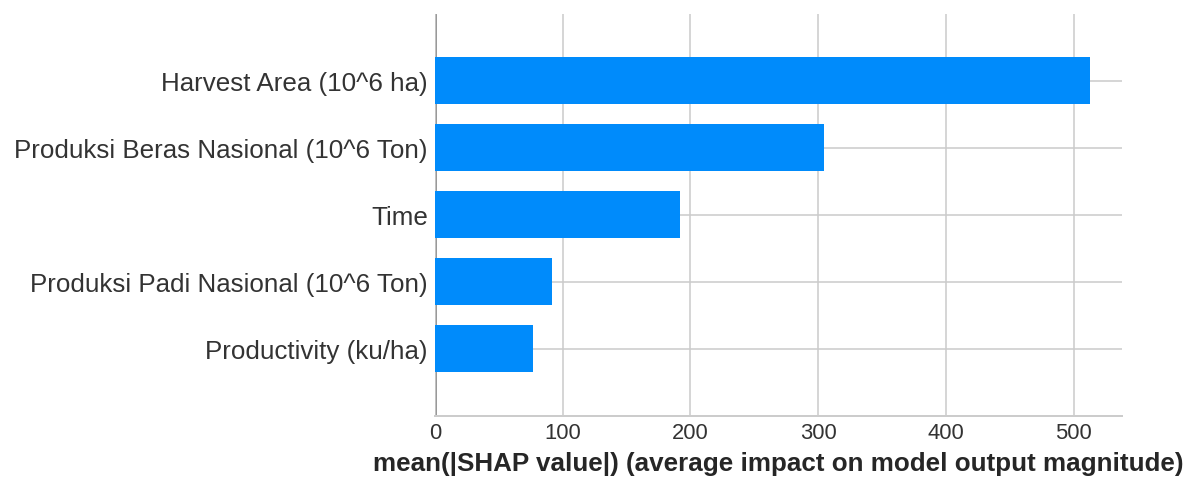

In [445]:
shap.summary_plot(shap_values_v3, x, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Bad Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

## Random Forest
### Average Price of Bad Quality Rice

In [446]:
# Train the model
regressor3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor3.fit(x, HargaBerasLuarkualitas)
AvgPriceBad_pred_v3 = regressor3.predict(x)
print(AvgPriceBad_pred_v3)
print(AvgPriceBad_pred_v3.shape)

[9785.43626 9736.33385 9626.32479 9194.6062  9022.82807 8981.92688
 9019.67319 8991.77487 9089.26451 9236.703   9370.48559 9436.37172
 9471.38166 9331.39061 9193.90065 9056.62968 8971.9113  9000.51957
 8957.61015 9022.82165 9176.51424 9236.34325 9287.4272  9314.67361
 9438.20933 9389.42016 9346.06555 9018.71803 8982.81796 9042.29394
 8959.58187 8992.44373 9020.66748 9095.43133 9126.54771 9106.46783
 9124.15816 9065.7421  8859.36696 8671.91853 8694.69629 8681.62731
 8550.57431 8655.78885 8612.82799 8651.25925 8752.44398 8828.88092]
(48,)


In [447]:
mae = np.mean(np.absolute(AvgPriceBad_pred_v3 - HargaBerasLuarkualitas))
mse = mean_squared_error(HargaBerasLuarkualitas,AvgPriceBad_pred_v3)
rss = np.mean((AvgPriceBad_pred_v3 - HargaBerasLuarkualitas) ** 2)
r2 =  r2_score(HargaBerasLuarkualitas , AvgPriceBad_pred_v3)
rmse = np.sqrt(mean_squared_error(HargaBerasLuarkualitas, AvgPriceBad_pred_v3))
rmsle = np.log(np.sqrt(mean_squared_error(HargaBerasLuarkualitas,AvgPriceBad_pred_v3)))
mape = np.mean(100 * (abs(AvgPriceBad_pred_v3 - HargaBerasLuarkualitas) / HargaBerasLuarkualitas))
accuracy = 100 - mape
evaluation['RF Bad'] = {'MAE':mae,'MSE':mse,'MAPE':mape,'R squared':r2,'RMSE':rmse,'RMSLE':rmsle,'Accuracy':accuracy}

In [448]:
AvgPriceBad_pred_with_randomforest = pd.Series(AvgPriceBad_pred_v3, index=x.index)

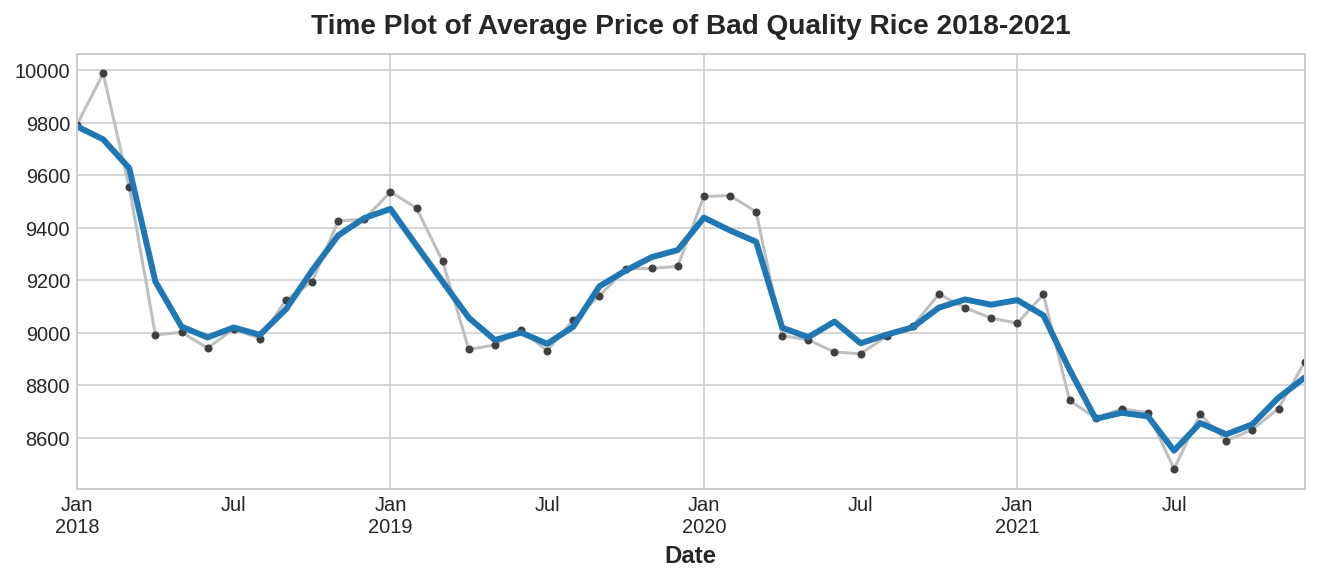

In [449]:
ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceBad_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Bad Quality Rice 2018-2021');

In [450]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(regressor3)
shap_values = explainer.shap_values(x)

In [451]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x,link="logit")

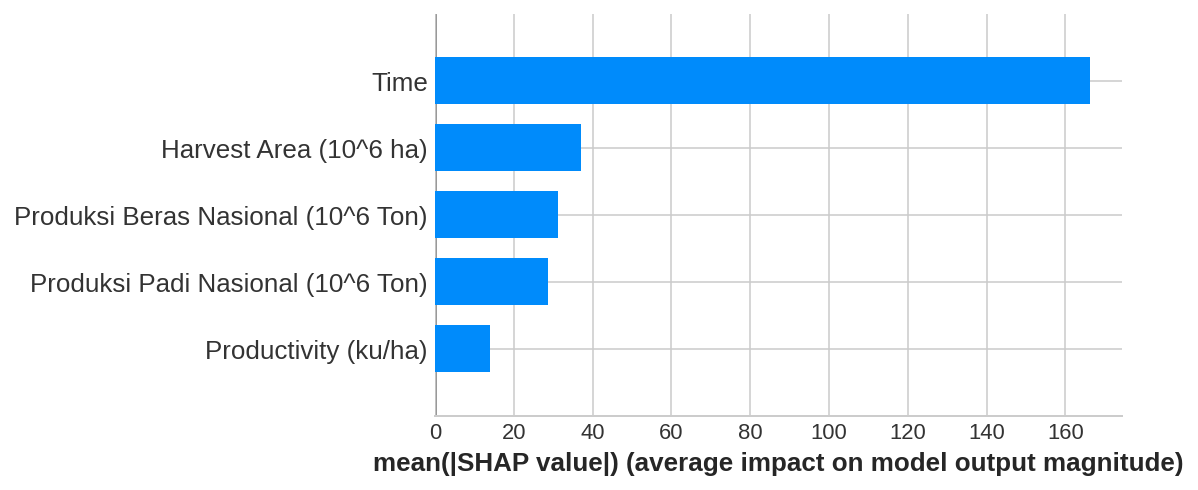

In [452]:
shap.summary_plot(shap_values, x, plot_type="bar")

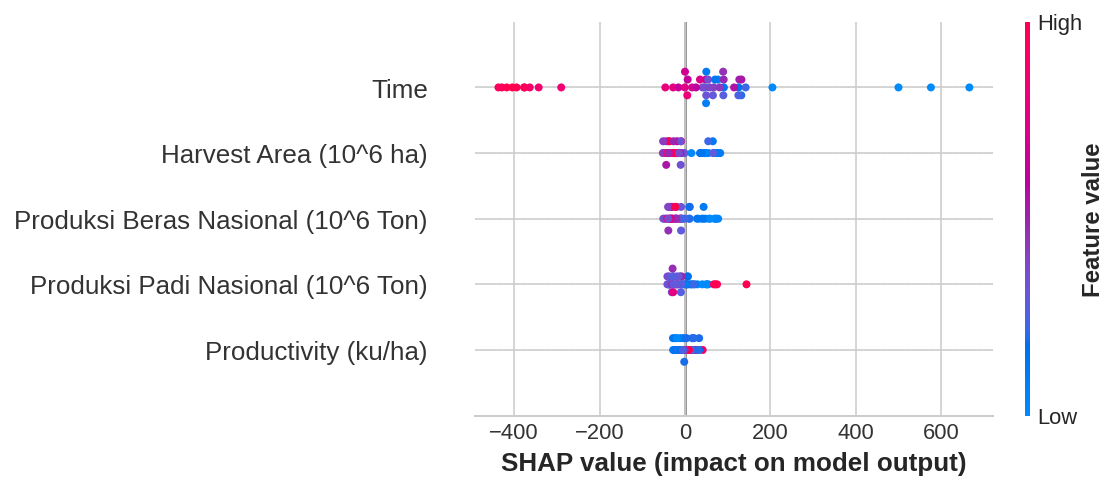

In [453]:
shap.summary_plot(shap_values, x)

    The feature important that has the largest average SHAP value in the Random Forest method on Bad Quality Rice is Time. High values of the Time variable have a high negative contribution on the prediction, while low values have a high positive contribution. The feature Productivity has almost no contribution to the prediction, whether its values are high or low.

### Collection of Visualizations

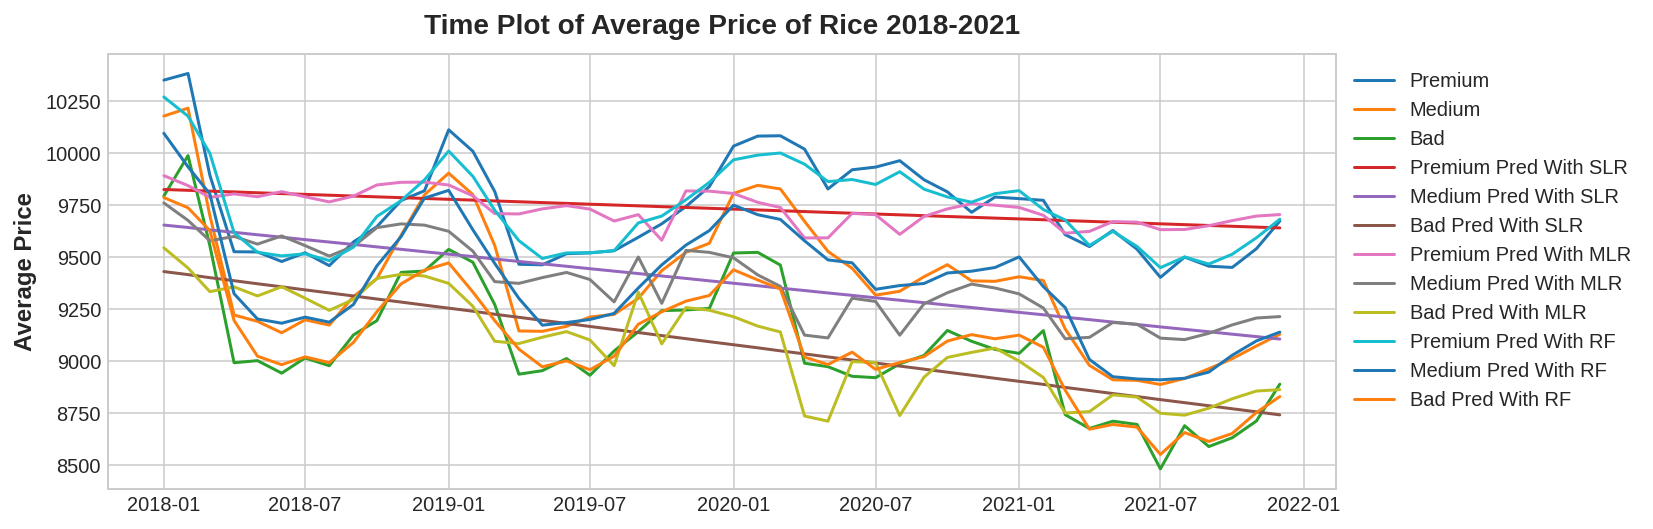

In [454]:
plt.plot(HargaBerasPremium,label='Premium') 
plt.plot(HargaBerasMedium,label='Medium') 
plt.plot(HargaBerasLuarkualitas,label='Bad') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Rice 2018-2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

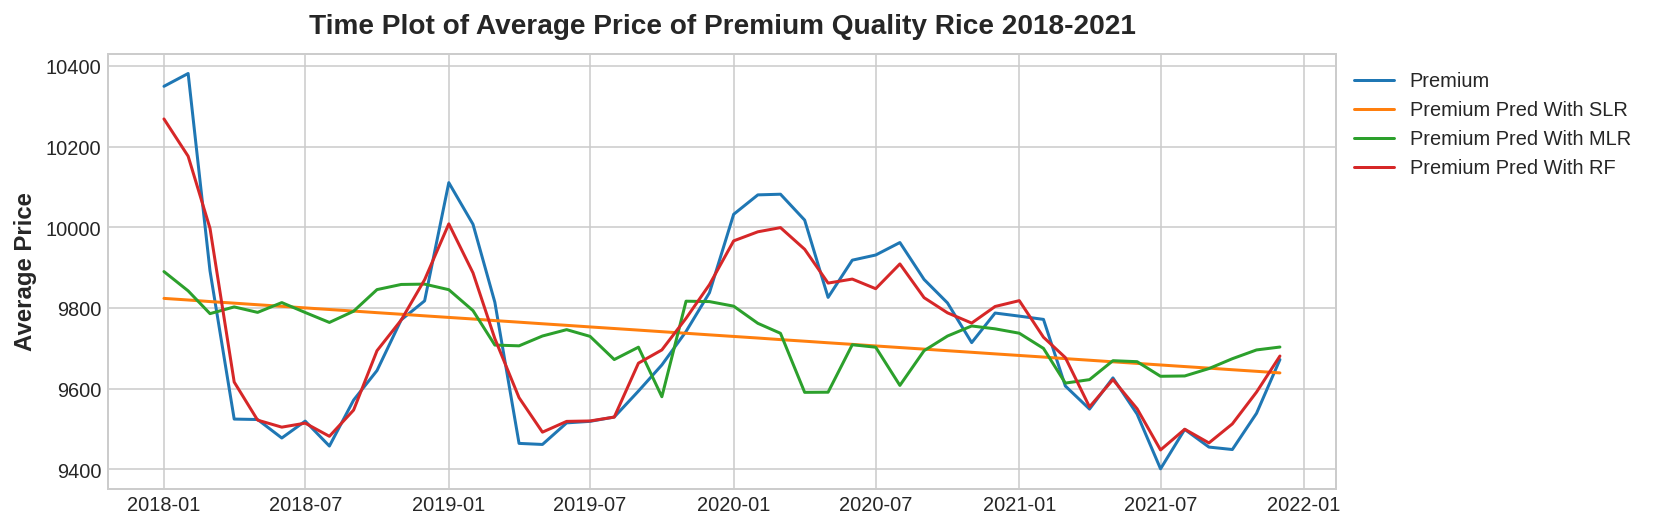

In [455]:
plt.plot(HargaBerasPremium,label='Premium') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.title('Time Plot of Average Price of Premium Quality Rice 2018-2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

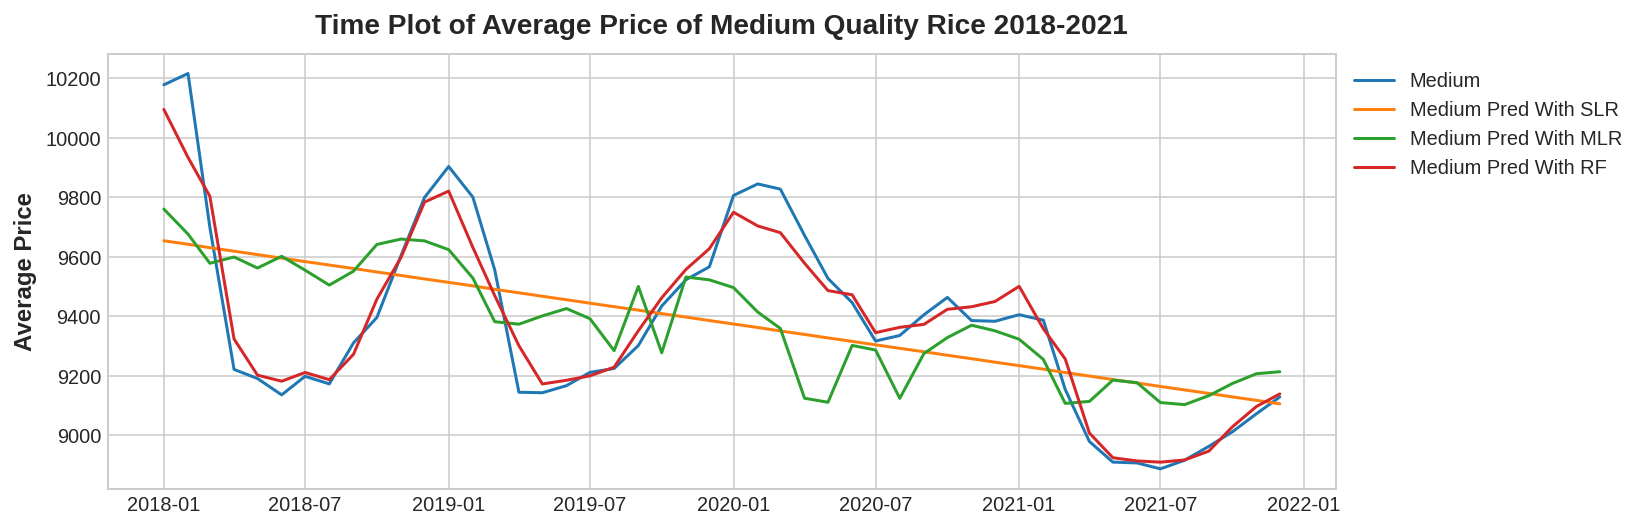

In [456]:
plt.plot(HargaBerasMedium,label='Medium') 
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.title('Time Plot of Average Price of Medium Quality Rice 2018-2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

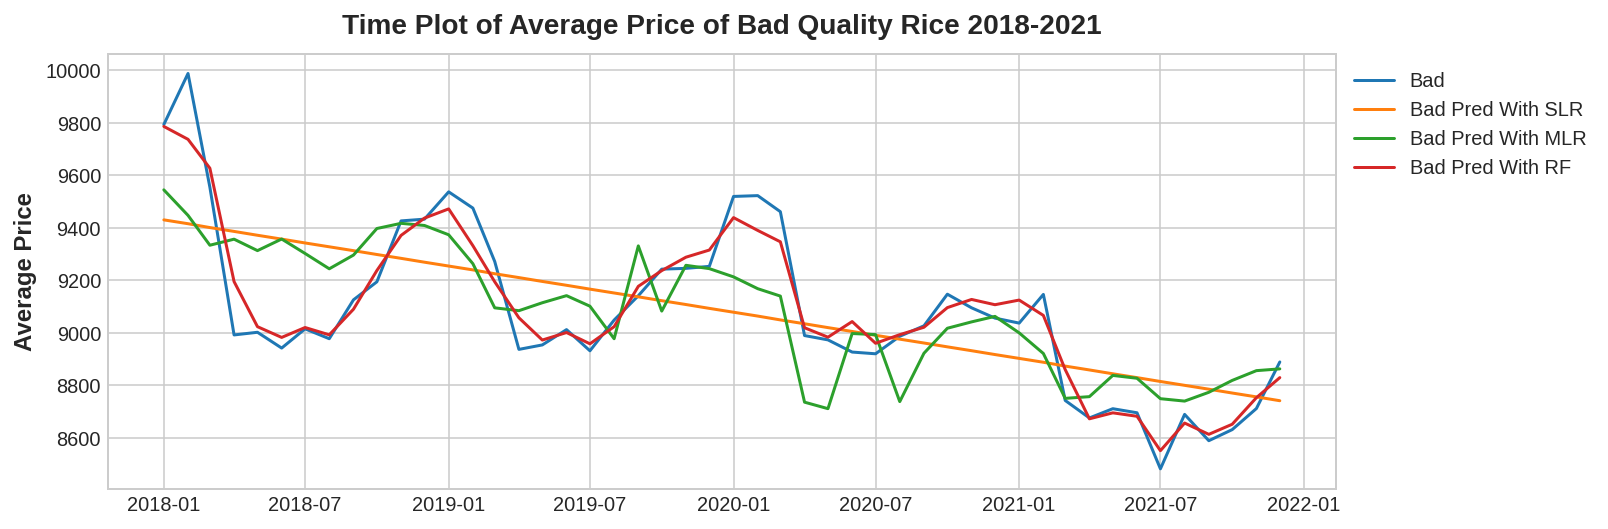

In [457]:
plt.plot(HargaBerasLuarkualitas,label='Bad') 
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Bad Quality Rice 2018-2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

Mean Absolute Error (MAE) 

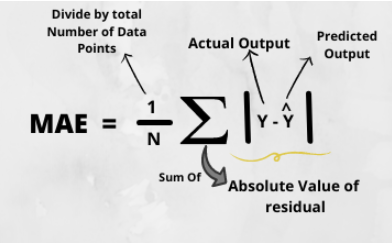

Mean Squared Error(MSE)

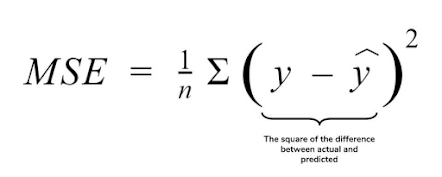

Mean Absolute Percentage Error (MAPE)

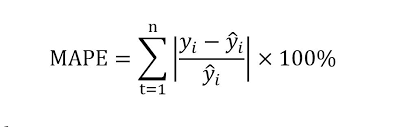

Accuracy = 100 - Mean Absolute Percentage Error

Root Mean Squared Error(RMSE) or root-mean-square deviation (RNSD)

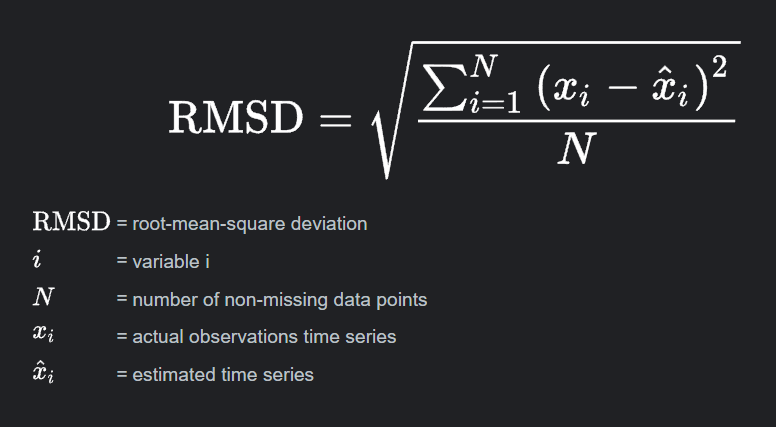


Root Mean Squared Log Error(RMSLE)

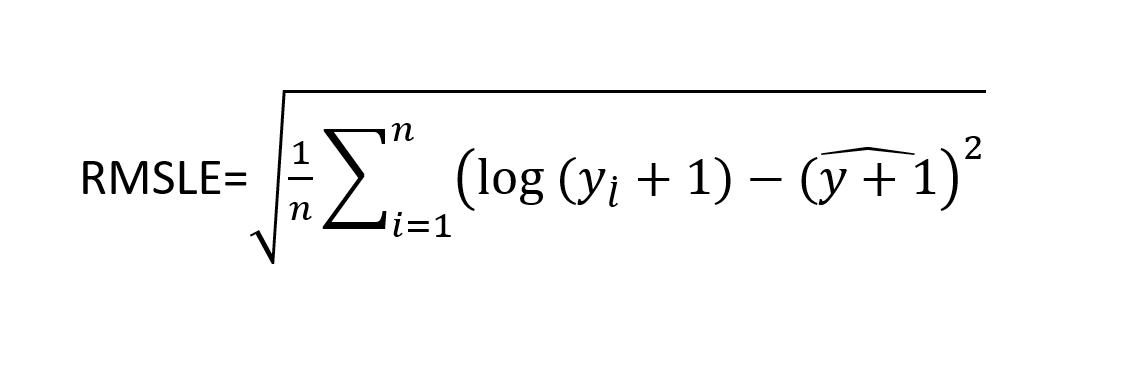

R Squared

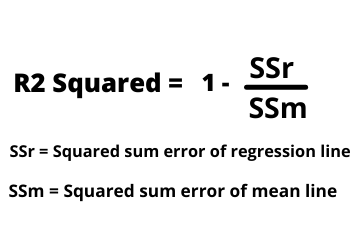

In [458]:
data_eval = pd.DataFrame(evaluation)
data_eval

SLR Premium   MLR Premium   RF Premium    SLR Medium  \
MAE          195.411047    189.512807    48.181838    235.106300   
MSE        53848.011126  50551.533722  3976.878550  76462.382800   
MAPE           1.999132      1.938122     0.489255      2.492854   
R squared      0.052175      0.110199     0.930000      0.254268   
RMSE         232.051742    224.836682    63.062497    276.518323   
RMSLE          5.446960      5.415374     4.144126      5.622277   
Accuracy      98.000868     98.061878    99.510745     97.507146   

             MLR Medium    RF Medium       SLR Bad       MLR Bad       RF Bad  
MAE          219.984285    54.598486    200.559722    173.235629    54.605233  
MSE        67934.080789  5882.142926  57286.183760  43895.431482  5666.476281  
MAPE           2.333631     0.570990      2.191006      1.895960     0.594333  
R squared      0.337444     0.942632      0.418437      0.554378     0.942475  
RMSE         260.641671    76.695130    239.345323    209.512366    75.276001  
RMSLE          5.563147     4.339838      5.477907      5.344783     4.321161  
Accuracy      97.666369    99.429010     97.808994     98.104040    99.405667